In [13]:
import pandas as pd
from libV2 import IIR, IIR_highpass, apply_filter, fill_na_mean
import numpy as np
import matplotlib.pyplot as plt

In [14]:
df = pd.read_csv('data/train.csv')

In [15]:
columns_to_forecast=['Rn_olb']
columns = ['date', 'RSAM', 'T_olb', 'Ru_olb', 'P_olb', 'Rn_olb', 'T_msa',
               'Ru_msa', 'P_msa', 'Rn_msa', 'displacement (cm)',
               'background seismicity']
na_cols = np.isnan(df[columns_to_forecast[0]].values)
df = df.assign(na_cols=na_cols)
df = fill_na_mean(df, columns)

date: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''


In [4]:
df

,date,RSAM,T_olb,Ru_olb,P_olb,Rn_olb,T_msa,Ru_msa,P_msa,Rn_msa,displacement (cm),background seismicity,na_cols
0,2011-07-04 00:00:00.000,0.000006,31.331711,81.377565,1014.697258,37469.610868,29.671118,61.955425,1037.680503,15253.667377,16.241425,111.250000,True
1,2011-07-05 00:00:00.000,0.000007,31.555856,81.461699,1012.848629,35389.891557,30.452226,61.416556,1034.673585,13801.624143,12.659712,90.625000,True
2,2011-07-06 00:00:00.000,0.000006,31.667928,81.503766,1011.924315,34350.031901,30.842780,61.147121,1033.170126,13075.602526,9.078000,80.312500,True
3,2011-07-07 00:00:00.000,0.000005,31.723964,81.524800,1011.462157,33830.102073,31.038056,61.012404,1032.418396,12712.591717,9.215500,75.156250,True
4,2011-07-08 00:00:00.000,0.000006,31.751982,81.535317,1011.231079,33570.137160,31.135695,60.945045,1032.042531,12531.086313,9.284250,72.578125,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2048,2016-08-29 00:00:00.000,0.000017,32.943478,83.184343,1009.863373,29220.821362,38.285547,64.687958,1045.523193,10361.998909,23.662571,234.968750,False
2049,2016-08-29 15:45:40.550,0.000017,32.969656,83.077131,1009.649067,29929.343226,38.285547,64.687958,1045.523193,10361.998909,23.662571,235.000000,True
2050,2016-08-30 00:00:00.000,0.000018,32.995833,82.969920,1009.434762,30637.865089,38.285547,64.687958,1045.523193,10361.998909,23.662571,185.924737,False
2051,2016-08-31 00:00:00.000,0.000025,32.941667,83.419556,1009.926184,26021.641265,36.060547,64.162958,1045.648193,14012.672421,23.662571,161.399069,False


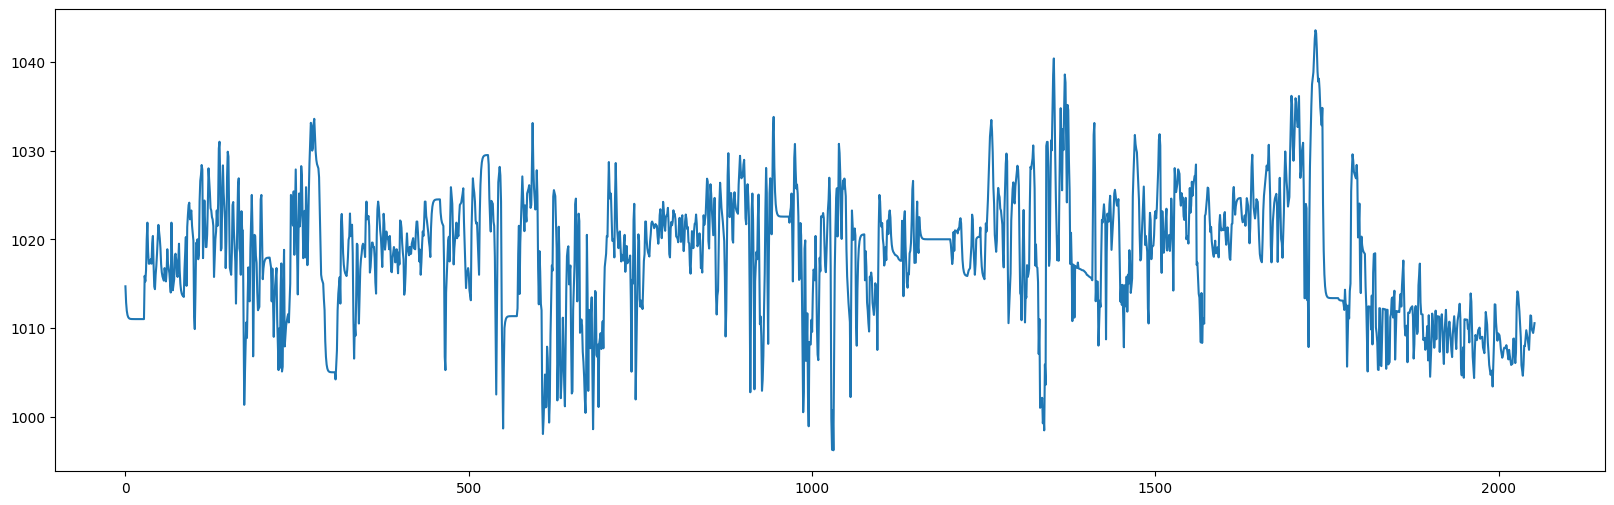

In [16]:
plt.figure(figsize=(20,6))
plt.plot(df['P_olb'])

In [17]:
target_columns = ['RSAM','Ru_olb', 'P_olb', 'Rn_olb']
filters = [IIR_highpass for i in range(len(target_columns))]
frame = IIR(df, target_columns=target_columns,filters=filters)

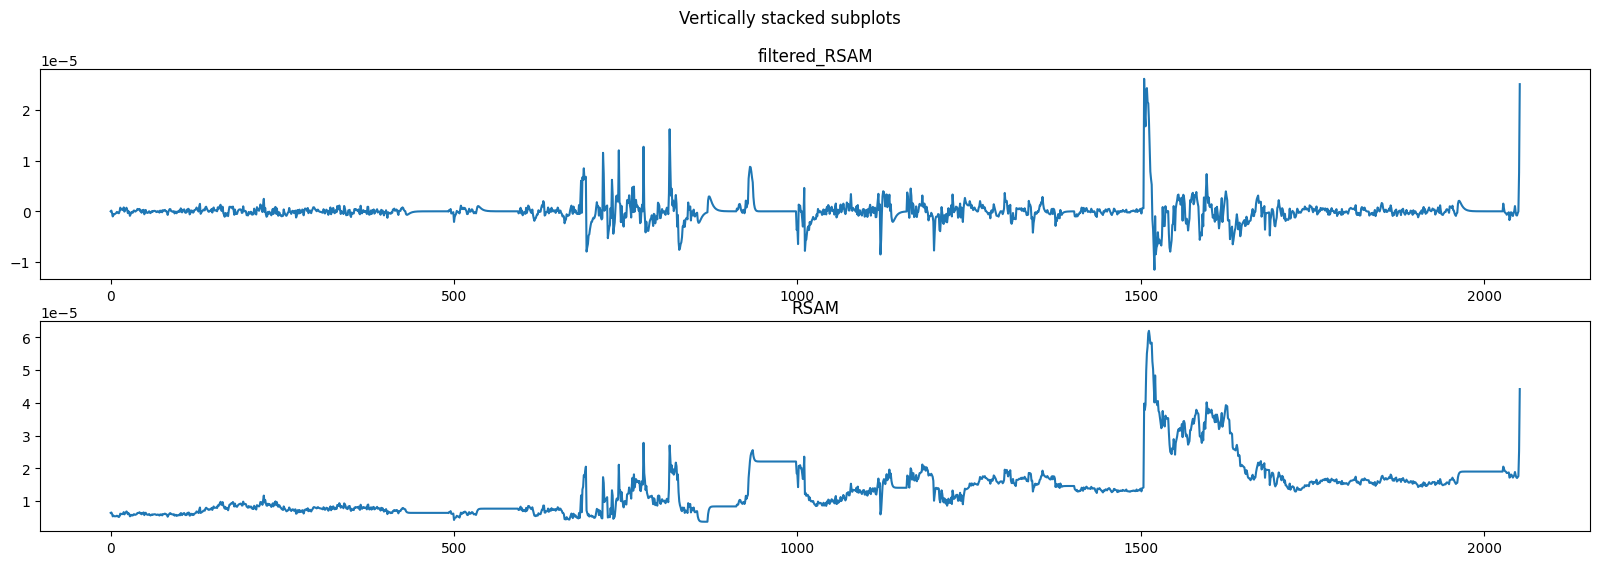

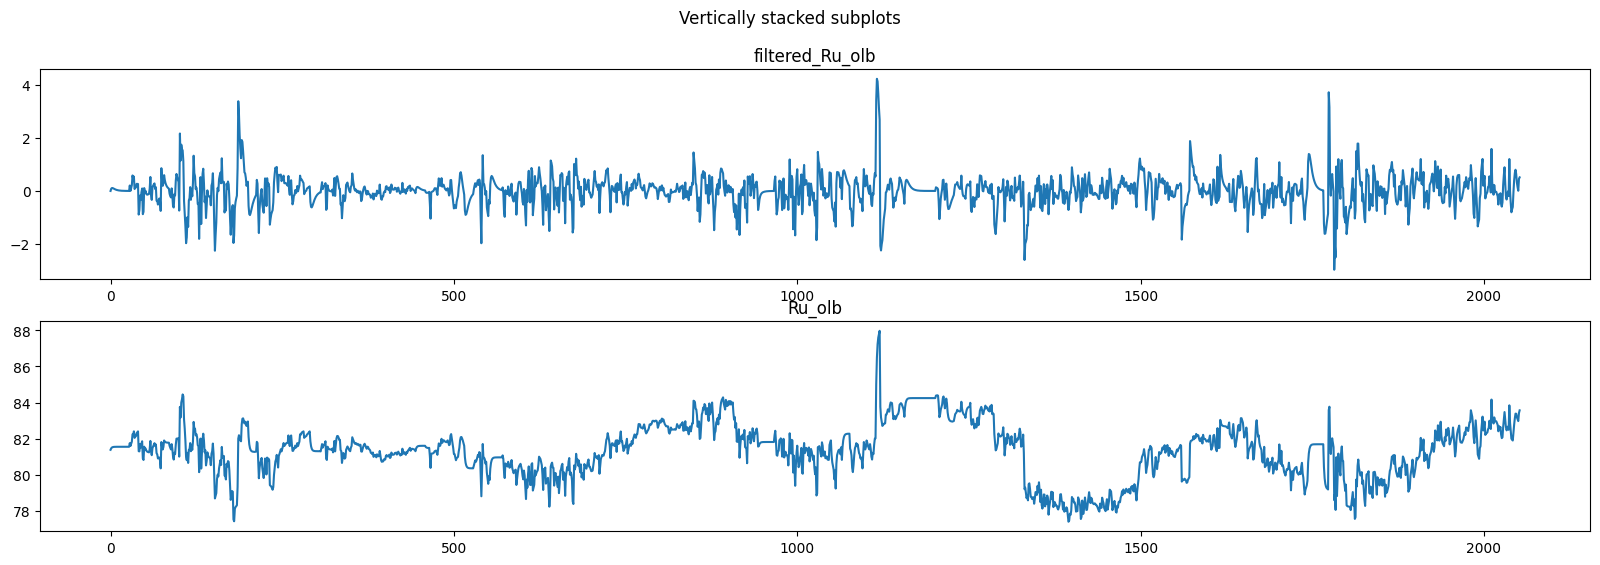

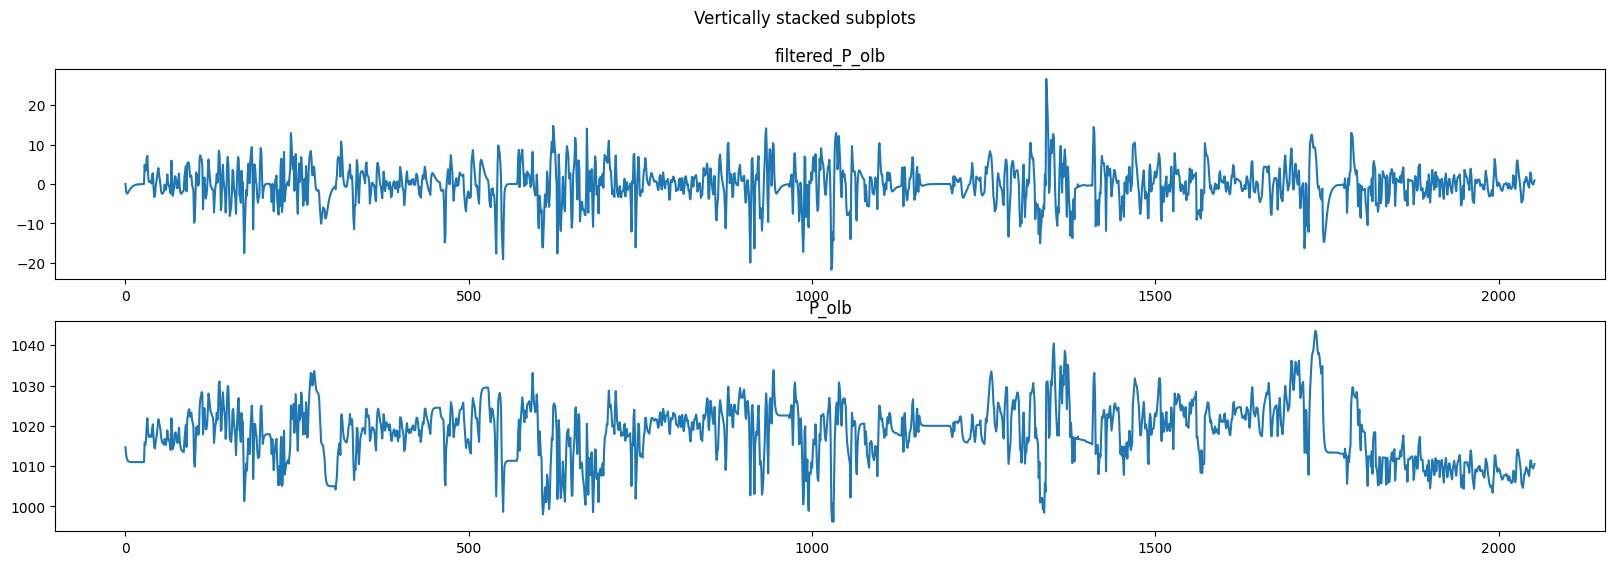

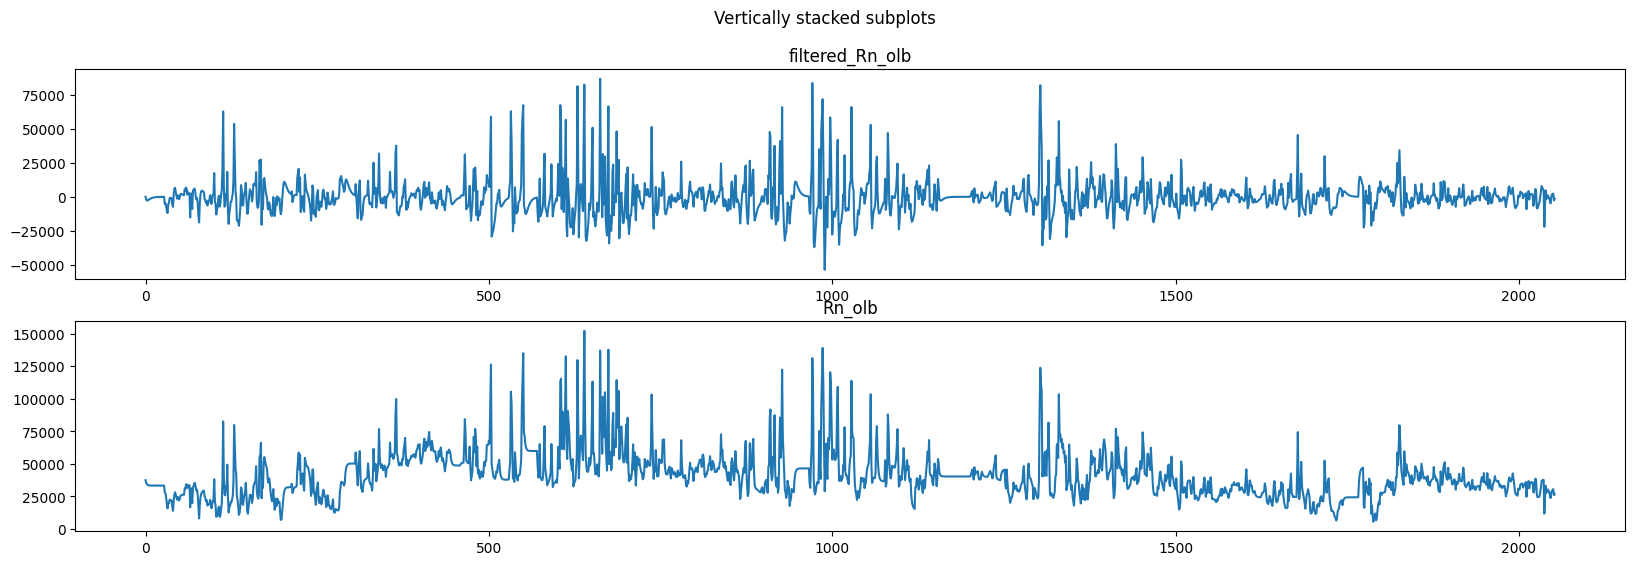

In [18]:
for elem in target_columns:
    fig, axs = plt.subplots(2, figsize=(20,6))
    fig.suptitle('Vertically stacked subplots')
    axs[0].plot(frame[f'filtered_{elem}'])
    axs[0].set_title(f'filtered_{elem}')
    axs[1].plot(frame[elem])
    axs[1].set_title(elem)



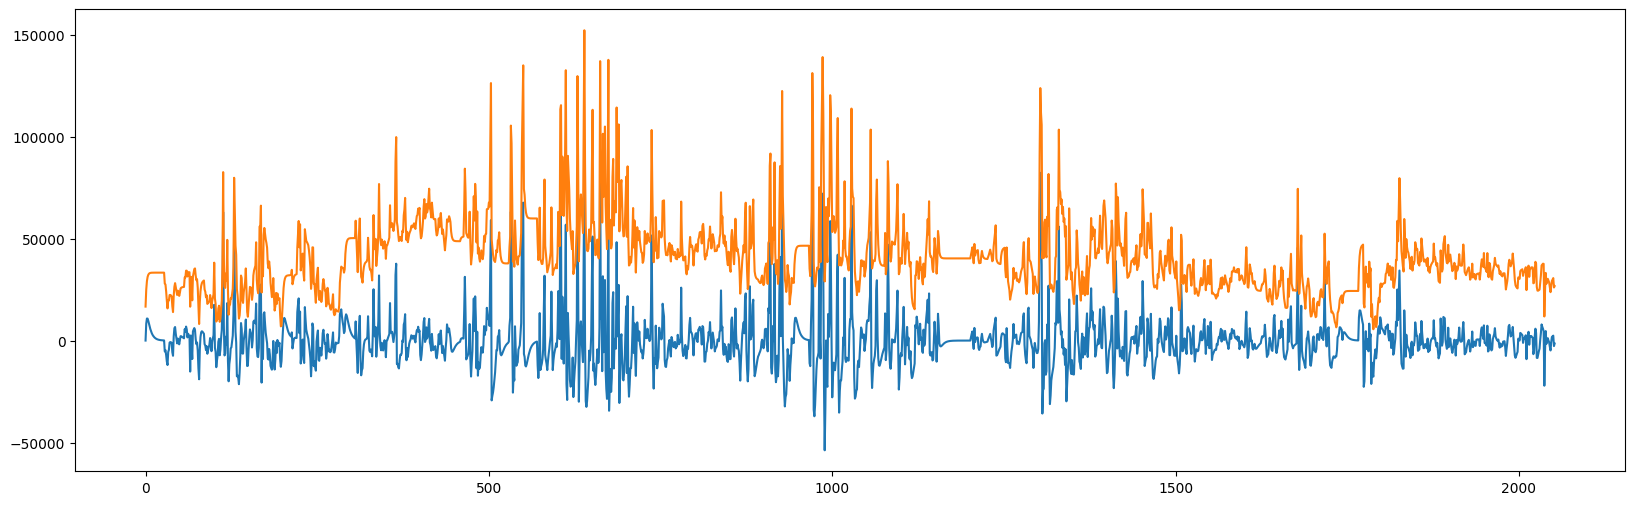

In [28]:
plt.figure(figsize=(20, 6))
plt.plot(frame['filtered_Rn_olb'])
plt.plot(frame['Rn_olb'])
plt.show()

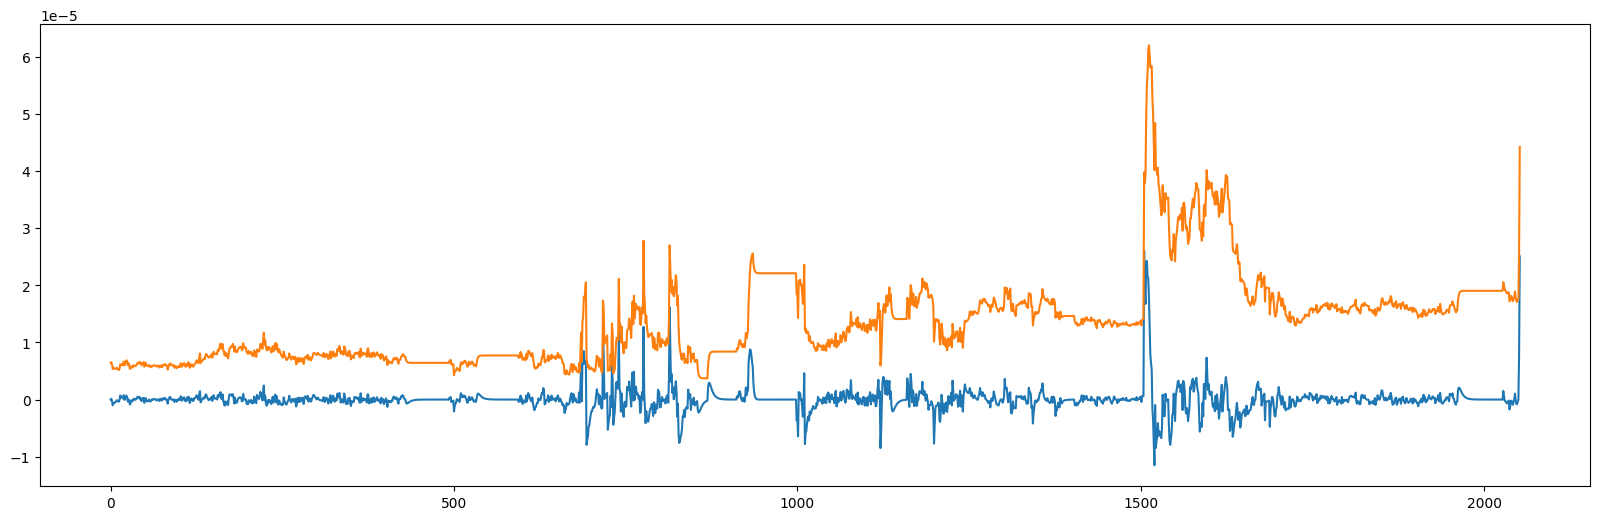

In [30]:
plt.figure(figsize=(20, 6))
plt.plot(frame['filtered_RSAM'])
plt.plot(frame['RSAM'])

In [38]:
from scipy.signal import freqz

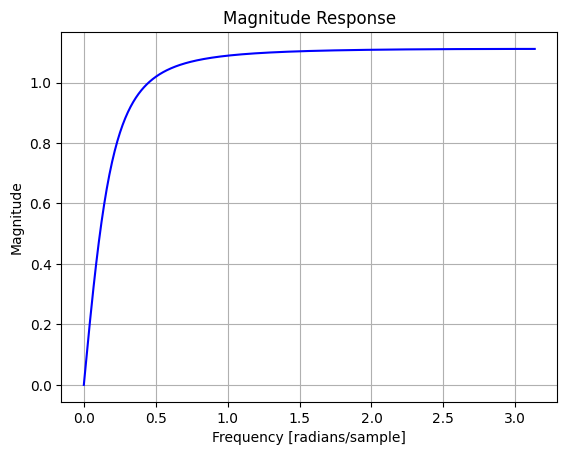

In [41]:
a = 0.8
b = [1,-1]
a = [1,-a]
w, h = freqz(b, a)
plt.figure()
plt.plot(w, np.abs(h), 'b')
plt.title('Magnitude Response')
plt.xlabel('Frequency [radians/sample]')
plt.ylabel('Magnitude')
plt.grid()